In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('../../data/processed/cleaned_music_population.csv')
df.head()

,popularity,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,0.531,Electronic
2,28.0,0.00306,0.620,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


Recordar utilizar varibles con one hot emcoding para ver si los modelos mejoran.

In [4]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.head()

,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,27.0,0.00468,0.652,0.941,0.79200,0.115,-5.201,0.0748,100.889,0.759
1,31.0,0.01270,0.622,0.890,0.95000,0.124,-7.043,0.0300,115.002,0.531
2,28.0,0.00306,0.620,0.755,0.01180,0.534,-4.617,0.0345,127.994,0.333
3,34.0,0.02540,0.774,0.700,0.00253,0.157,-4.498,0.2390,128.014,0.270
4,32.0,0.00465,0.638,0.587,0.90900,0.157,-6.266,0.0413,145.036,0.323


In [5]:
X = df_numeric.drop(columns=['popularity'])
y = df_numeric['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [6]:
df_results = X_test.copy()
df_results['popularity_real'] = y_test
df_results['popularity_pred'] = y_pred.round(2)

df_results.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity_real,popularity_pred
15986,0.01170,0.585,0.9270,0.000000,0.0889,-3.059,0.0572,99.961,0.896,42.0,46.90
2972,0.00927,0.591,0.8280,0.000000,0.3280,-4.155,0.0400,154.965,0.300,48.0,47.30
34645,0.05130,0.717,0.7080,0.000000,0.0929,-4.575,0.0369,119.138,0.758,64.0,50.24
5644,0.00265,0.542,0.9230,0.000002,0.3890,-4.116,0.1190,123.751,0.673,20.0,45.43
7445,0.99400,0.270,0.0171,0.921000,0.1450,-31.429,0.0410,70.931,0.147,28.0,24.37
17867,0.28500,0.598,0.5470,0.000000,0.0891,-5.930,0.0232,77.969,0.250,55.0,49.59
20044,0.71200,0.658,0.3250,0.002610,0.1580,-17.557,0.0282,107.456,0.483,44.0,43.96
29628,0.82900,0.585,0.1310,0.798000,0.1050,-17.706,0.0393,87.550,0.350,25.0,35.81
23044,0.03120,0.618,0.7270,0.000000,0.1960,-7.224,0.2080,164.992,0.401,63.0,50.47
3793,0.17400,0.615,0.8950,0.463000,0.4780,-6.149,0.0433,167.989,0.700,43.0,37.68


In [7]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

for idx, col_name in enumerate(X.columns):
    print(f'Coefficient for {col_name}: {model.coef_[idx]}')

Intercept: 44.32904820079965
Coefficients: [-2.18141522  3.33639925 -2.06286244 -3.59167326 -1.05794827  2.1714891
  1.64316772 -0.32303836 -0.9868104 ]
Coefficient for acousticness: -2.1814152181084294
Coefficient for danceability: 3.336399248197615
Coefficient for energy: -2.062862438920451
Coefficient for instrumentalness: -3.5916732589961464
Coefficient for liveness: -1.0579482668124596
Coefficient for loudness: 2.171489098326783
Coefficient for speechiness: 1.643167721915935
Coefficient for tempo: -0.3230383568832099
Coefficient for valence: -0.9868103954190829


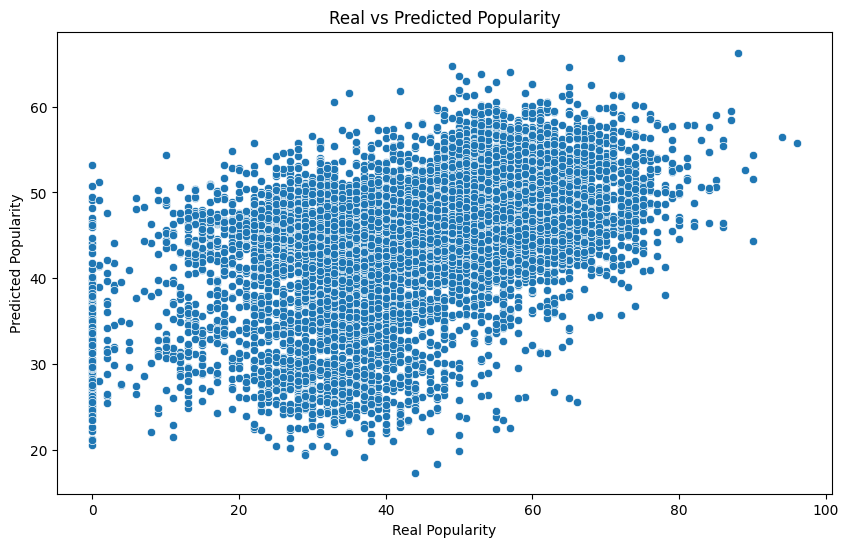

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity_real', y='popularity_pred', data=df_results)
plt.title('Real vs Predicted Popularity')
plt.xlabel('Real Popularity')
plt.ylabel('Predicted Popularity')
plt.show()

In [9]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
rsme = mse ** 0.5
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rsme}')
print(f'R-squared: {r2}')
print(f'Mean Absolute Error: {mae}')


Mean Squared Error: 187.8229085196478
Root Mean Squared Error: 13.704849817478767
R-squared: 0.23130463788916567
Mean Absolute Error: 10.783136142436303


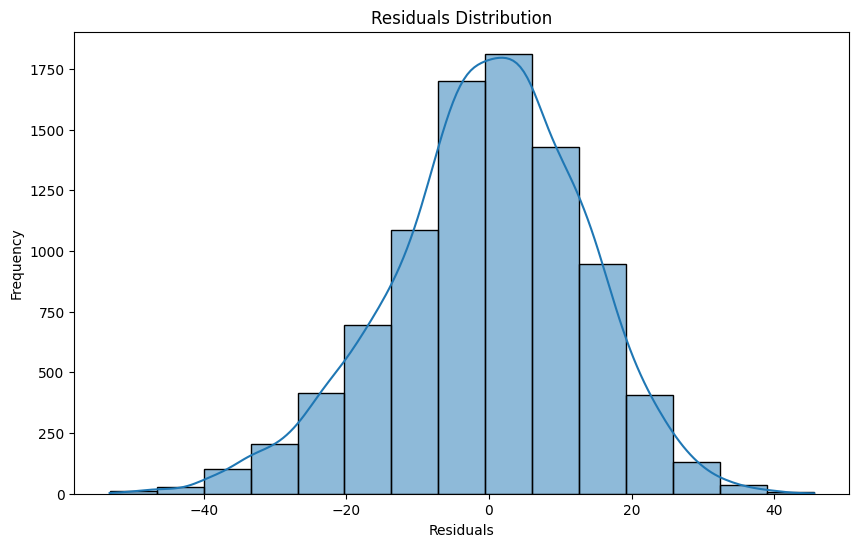

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(y_test - y_pred, bins=15, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [11]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_scaled, y_train)

y_pred_dt = dt_model.predict(X_test_scaled)

In [12]:
df_results_tree = X_test.copy()
df_results_tree['popularity_real'] = y_test
df_results_tree['popularity_pred'] = y_pred_dt.round(2)

df_results_tree.head(10)

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity_real,popularity_pred
15986,0.01170,0.585,0.9270,0.000000,0.0889,-3.059,0.0572,99.961,0.896,42.0,20.0
2972,0.00927,0.591,0.8280,0.000000,0.3280,-4.155,0.0400,154.965,0.300,48.0,64.0
34645,0.05130,0.717,0.7080,0.000000,0.0929,-4.575,0.0369,119.138,0.758,64.0,56.0
5644,0.00265,0.542,0.9230,0.000002,0.3890,-4.116,0.1190,123.751,0.673,20.0,52.0
7445,0.99400,0.270,0.0171,0.921000,0.1450,-31.429,0.0410,70.931,0.147,28.0,31.0
17867,0.28500,0.598,0.5470,0.000000,0.0891,-5.930,0.0232,77.969,0.250,55.0,46.0
20044,0.71200,0.658,0.3250,0.002610,0.1580,-17.557,0.0282,107.456,0.483,44.0,28.0
29628,0.82900,0.585,0.1310,0.798000,0.1050,-17.706,0.0393,87.550,0.350,25.0,25.0
23044,0.03120,0.618,0.7270,0.000000,0.1960,-7.224,0.2080,164.992,0.401,63.0,61.0
3793,0.17400,0.615,0.8950,0.463000,0.4780,-6.149,0.0433,167.989,0.700,43.0,43.0


En este caso tenemos un peor desempeño para los arboles de decision, deberiamos cambiar parametros para ver si mejora

In [13]:
mse_tree = mean_squared_error(y_test, y_pred_dt)
rsme_tree = mse_tree ** 0.5
r2_tree = r2_score(y_test, y_pred_dt)
mae_tree = mean_absolute_error(y_test, y_pred_dt)

print(f'Mean Squared Error: {mse_tree}')
print(f'Root Mean Squared Error: {rsme_tree}')
print(f'R-squared: {r2_tree}')
print(f'Mean Absolute Error: {mae_tree}')

Mean Squared Error: 333.05309985685375
Root Mean Squared Error: 18.249742460014435
R-squared: -0.3630732013172857
Mean Absolute Error: 13.816674070783355


Obtuvimos un mejor resultado con el RandomForestRegressor

In [14]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_scaled, y_train)

y_pred_rf = model_rf.predict(X_test_scaled)

In [15]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print(f'Mean Squared Error (RF): {mse_rf}')
print(f'Root Mean Squared Error (RF): {rmse_rf}')
print(f'R-squared (RF): {r2_rf}')
print(f'Mean Absolute Error (RF): {mae_rf}')

Mean Squared Error (RF): 161.9854197541042
Root Mean Squared Error (RF): 12.727349282317359
R-squared (RF): 0.3370487025466806
Mean Absolute Error (RF): 9.80544325105148


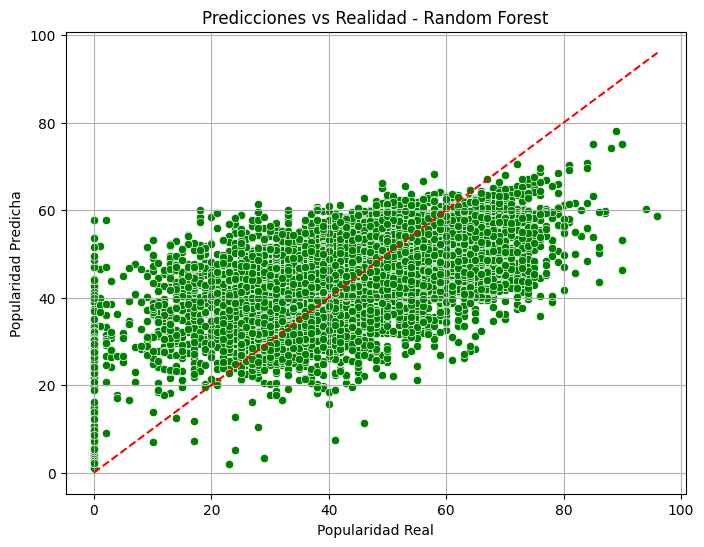

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Popularidad Real")
plt.ylabel("Popularidad Predicha")
plt.title("Predicciones vs Realidad - Random Forest")
plt.grid(True)
plt.show()